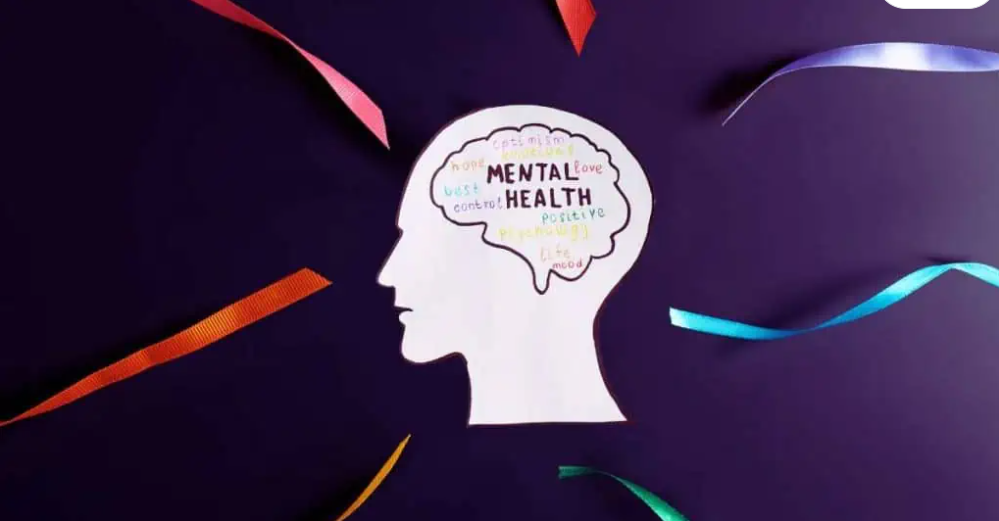

In [2]:
# Hello, I am Avinash Today we are going to Analyze Student Mental Health data and getting insights from it.

from IPython.display import Image, display
display(Image(filename=r"/content/Mental health image.png"))


# **Understanding the data in the dataset.**

# The dataset consists of 101 student records across 11 columns, featuring a mix of categorical and numerical data, minimal missing values, diverse academic representation, and binary mental health indicators, making it suitable for analyzing mental health trends among university students.

In [3]:
# Let's import the required libraries for our analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random

In [4]:
# Now, let's load the data and know more about that.

df = pd.read_csv('/content/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
# To check how many cols and rows present in the dataset.

df.shape

(101, 11)

In [6]:
# Now, check the datatypes of the data.

df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [7]:
# Check unique values in the dataset.

df.nunique()

,0
Timestamp,92
Choose your gender,2
Age,7
What is your course?,49
Your current year of Study,7
What is your CGPA?,6
Marital status,2
Do you have Depression?,2
Do you have Anxiety?,2
Do you have Panic attack?,2


In [8]:
# Now, check the null values in the dataset.

df.isnull().sum()

,0
Timestamp,0
Choose your gender,0
Age,1
What is your course?,0
Your current year of Study,0
What is your CGPA?,0
Marital status,0
Do you have Depression?,0
Do you have Anxiety?,0
Do you have Panic attack?,0


In [9]:
# In the above column we have 1 missing vales, so we need to modify it.

df = df.dropna(how='any',axis=0)


In [10]:
#Now, let's check once again, if there are any missinng values in the data.

df.isnull().sum()

,0
Timestamp,0
Choose your gender,0
Age,0
What is your course?,0
Your current year of Study,0
What is your CGPA?,0
Marital status,0
Do you have Depression?,0
Do you have Anxiety?,0
Do you have Panic attack?,0


# DATA VIZUALIZATION

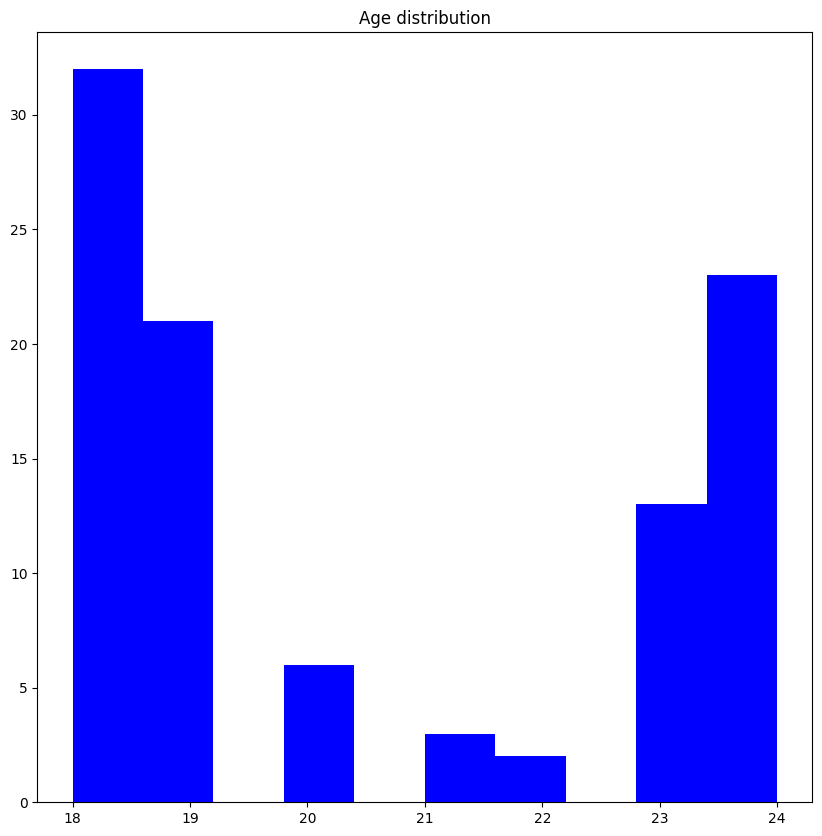

In [11]:
# From, Now, Let' see data vizs to understand data in a better way.

plt.figure(figsize=(10,10))
plt.hist(df['Age'],color='b')
plt.title("Age distribution");

In [12]:
#I see the columns are very big, so let's change the col name

df.rename(columns = {'Choose your gender': 'gender'}, inplace = True)


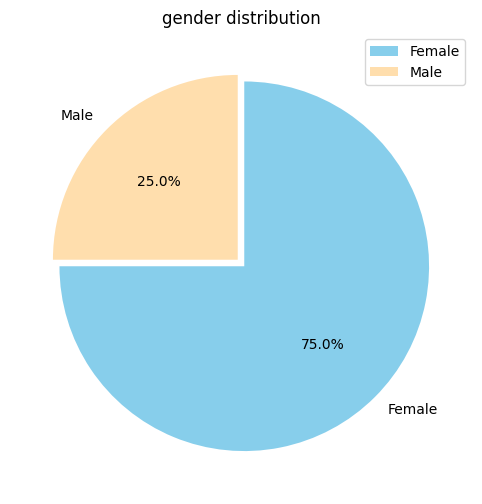

In [14]:
#Let's see gender distribution

plt.figure(figsize=(12,6))
plt.title("gender distribution")
g = plt.pie(df.gender.value_counts(), explode=(0.025,0.025), labels=df.gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

<ipython-input-16-1b2c60046ec2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Your current year of Study', palette='Set2')


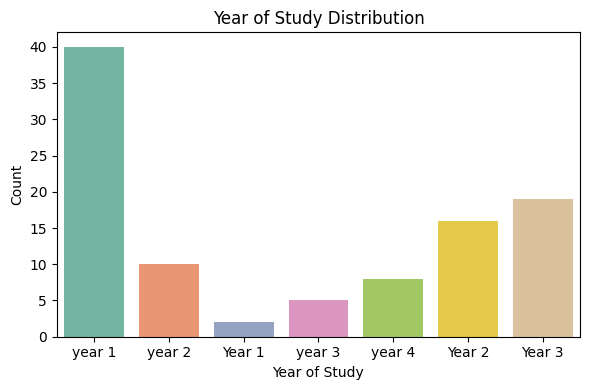

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Your current year of Study', palette='Set2')
plt.title('Year of Study Distribution')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('viz_year_distribution.png')
plt.show()

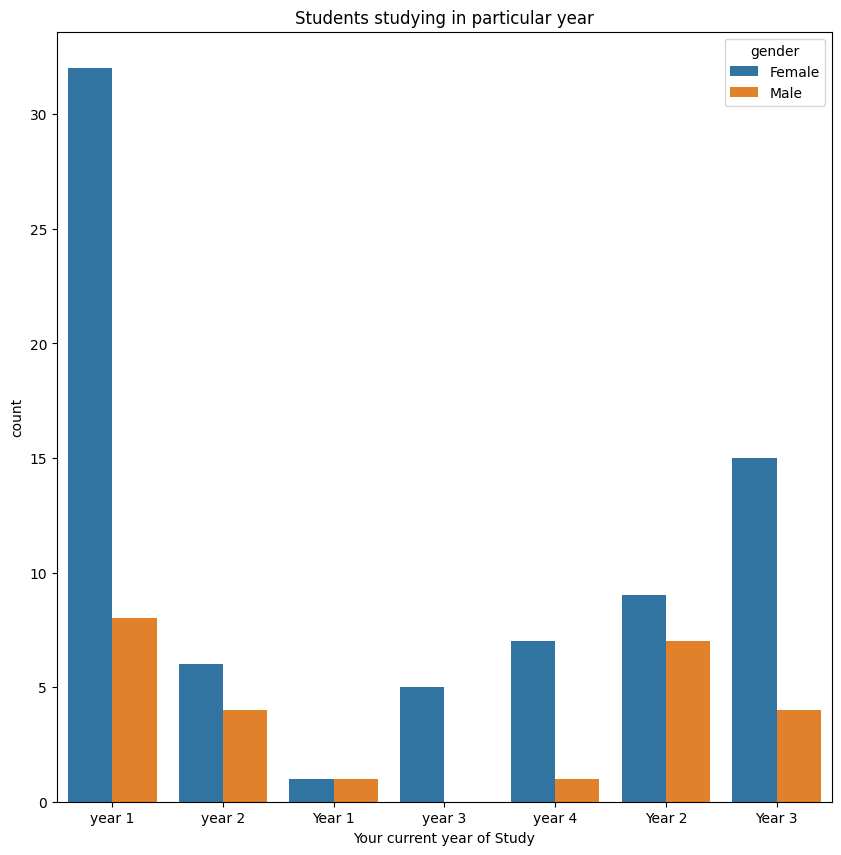

In [18]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Your current year of Study', hue='gender', data=df)
plt.title("Students studying in particular year")
plt.show()

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(df['Do you have Anxiety?'],hue=df['Do you have Depression?'])
plt.title("Students studyig in particular year");
plt.show()

# I get this error because - Seaborn's countplot expects the data parameter to be a DataFrame, and you need to pass column names directly without indexing the DataFrame with square brackets.

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1000x1000 with 0 Axes>

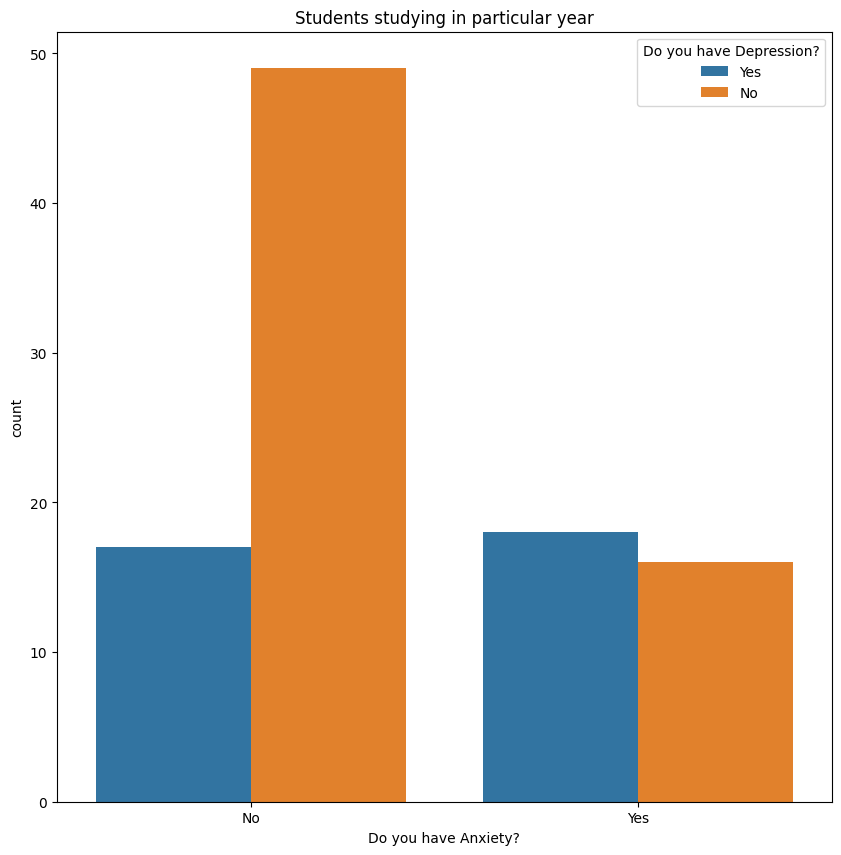

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='Do you have Anxiety?', hue='Do you have Depression?')
plt.title("Students studying in particular year")
plt.show()

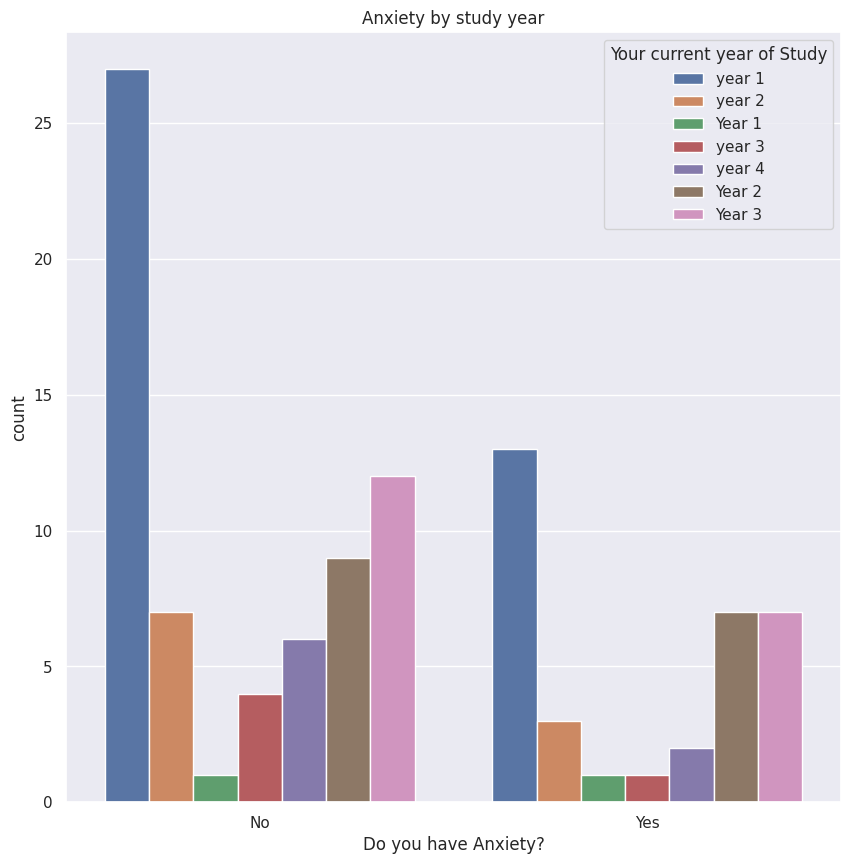

In [22]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()

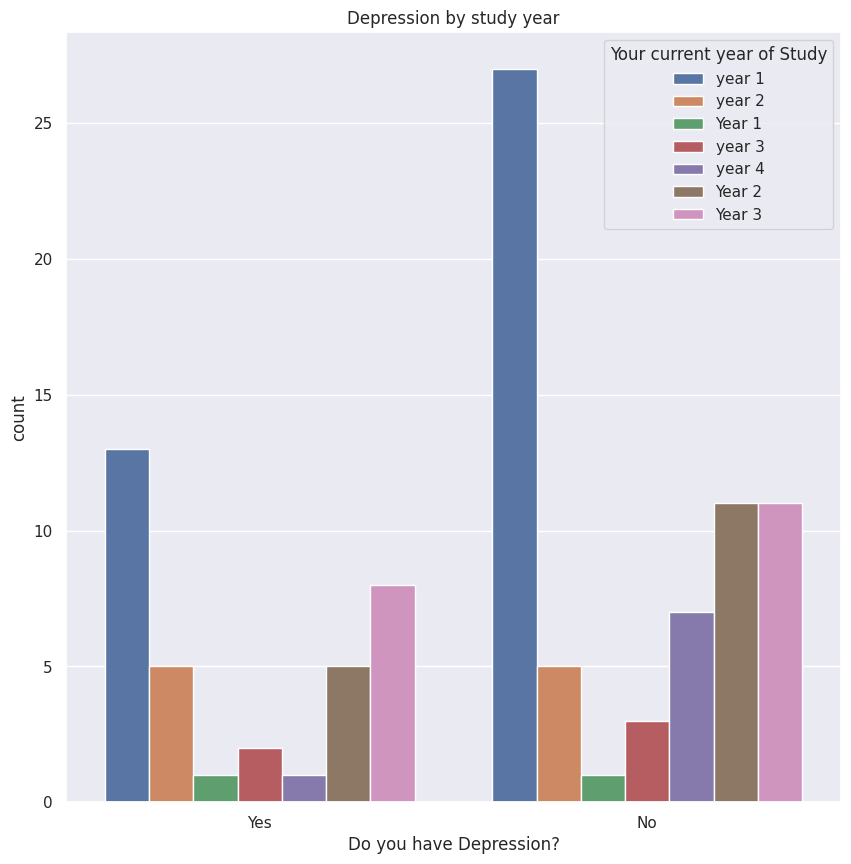

In [23]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Depression?", hue="Your current year of Study", data=df)
plt.title("Depression by study year")
plt.show()

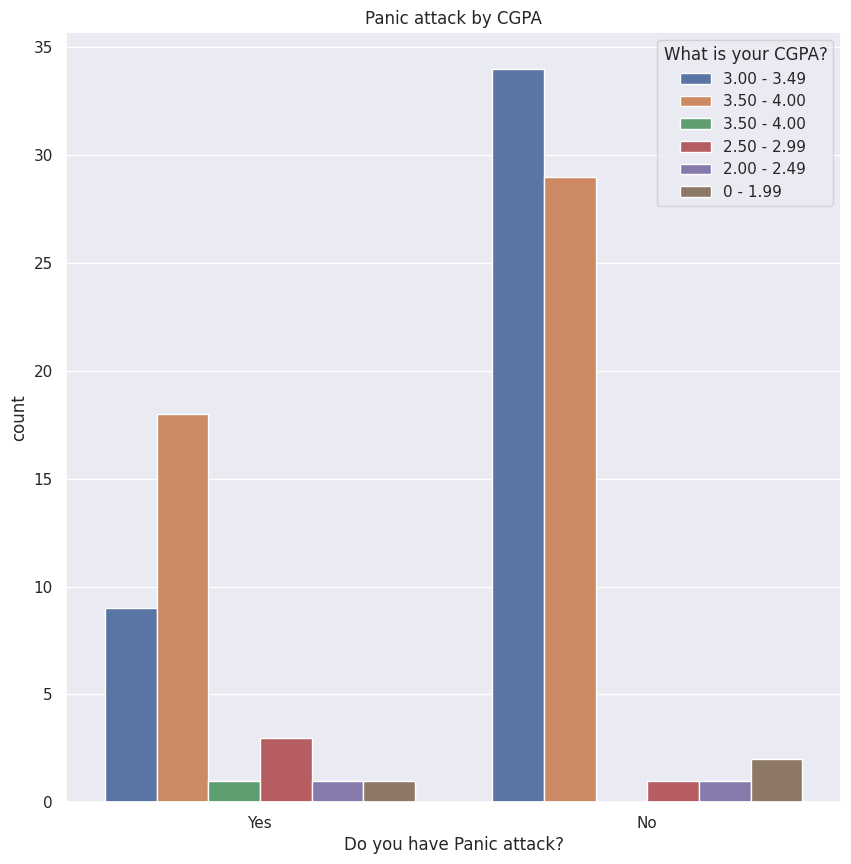

In [24]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Panic attack?", hue="What is your CGPA?", data=df)
plt.title("Panic attack by CGPA")
plt.show()

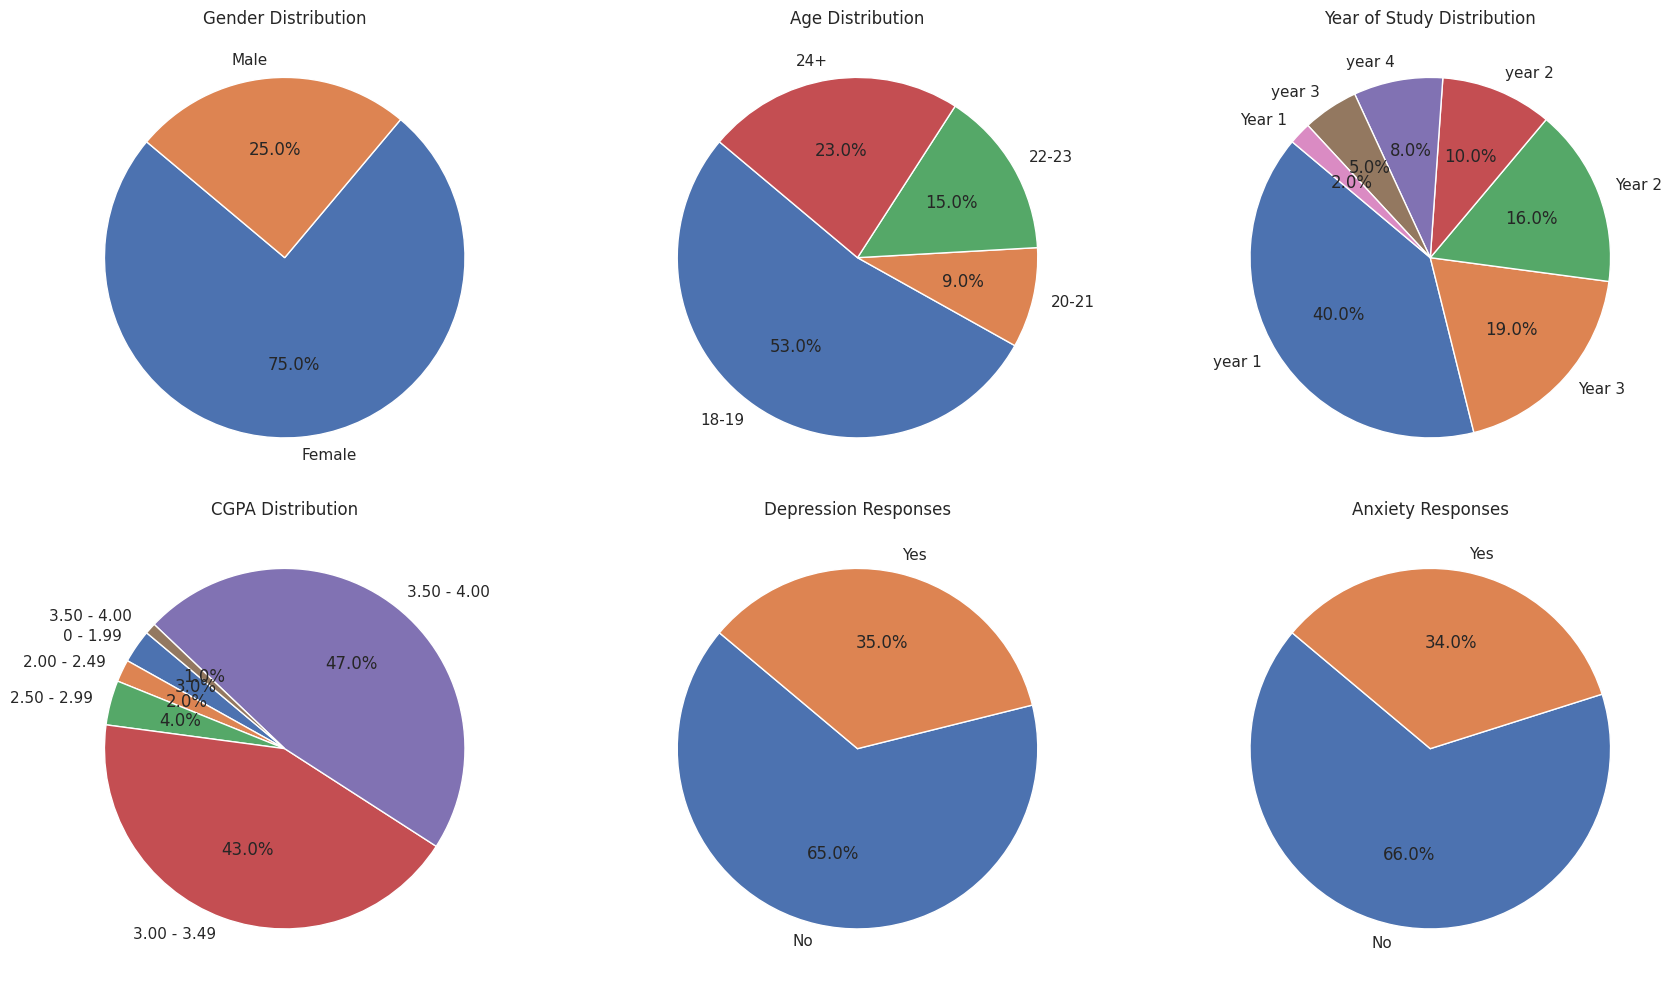

done


In [30]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Gender Distribution Pie Chart
gender_counts = df['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Gender Distribution')

# 2. Age Distribution Pie Chart (Binning the ages)
age_bins = [17, 19, 21, 23, 25]
age_labels = ['18-19', '20-21', '22-23', '24+']
df['Age_bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)
age_counts = df['Age_bin'].value_counts().sort_index()
axes[0, 1].pie(age_counts, labels=age_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Age Distribution')

# 3. Current Year of Study Pie Chart
year_counts = df['Your current year of Study'].value_counts()
axes[0, 2].pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 2].set_title('Year of Study Distribution')

# 4. CGPA Distribution Pie Chart (Binning CGPA)
cgpa_bins = sorted(df['What is your CGPA?'].dropna().unique())
# To create bins, we can use quantile based limiting if many unique values, otherwise, we directly count values
cgpa_counts = df['What is your CGPA?'].value_counts().sort_index()
axes[1, 0].pie(cgpa_counts, labels=cgpa_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('CGPA Distribution')

# 5. Depression Responses Pie Chart
dep_counts = df['Do you have Depression?'].value_counts()
axes[1, 1].pie(dep_counts, labels=dep_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Depression Responses')

# 6. Anxiety Responses Pie Chart
anx_counts = df['Do you have Anxiety?'].value_counts()
axes[1, 2].pie(anx_counts, labels=anx_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 2].set_title('Anxiety Responses')

plt.tight_layout()
plt.show()
print('done')